In [1]:
import nltk
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re

In [2]:
import statistics

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
latlib_df = pd.read_pickle("/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/data/latinlibrary_data.pkl")

In [5]:
ne_df = pd.read_pickle("/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/data/latinlibrary_ne_data.pkl")

In [6]:
#here's some of the data:
latlib_df.head()

,title,text,text_raw,tokens,token_count
0,Ammianus: Liber XXXI,AMMIANI MARCELLINI HISTORIAE LIBER XXXI ...,"[AMMIANI MARCELLINI HISTORIAE LIBER XXXI\n, \n...","[AMMIANI, MARCELLINI, HISTORIAE, LIBER, XXXI, ...",11030
1,Valerius Maximus I,VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILIV...,[VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILI...,"[VALERI, MAXIMI, FACTORVM, ET, DICTORVM, MEMOR...",10524
2,Valerius Maximus VIII,VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILIV...,[VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILI...,"[VALERI, MAXIMI, FACTORVM, ET, DICTORVM, MEMOR...",10337
3,Valerius Maximus IV,VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILIV...,[VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILI...,"[VALERI, MAXIMI, FACTORVM, ET, DICTORVM, MEMOR...",10852
4,Valerius Maximus VII,VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILIV...,[VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILI...,"[VALERI, MAXIMI, FACTORVM, ET, DICTORVM, MEMOR...",8918


In [7]:
ne_df.head()

,name,era
0,AMMIANVS MARCELLINVS,(4th century A.D.)
1,VALERIVS MAXIMVS,(1st century A.D.)
2,GAIVS VALERIVS FLACCVS,(died c. 90 A.D.)
4,P. VERGILIVS MARO,(70 – 19 B.C.)
6,ALBIVS TIBVLLVS,(c. 54 – 19 B.C.)


Here's some basic info on the data contained in latlib_df:

In [8]:
#overall shape of the dataframe:
latlib_df.shape

(672, 5)

In [9]:
latlib_df.describe()

,token_count
count,672.000000
mean,6331.989583
std,5564.159005
min,0.000000
25%,1681.500000
50%,5578.500000
75%,8590.500000
max,38414.000000


In [10]:
latlib_df.info()
#good! no null objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        672 non-null    object
 1   text         672 non-null    object
 2   text_raw     672 non-null    object
 3   tokens       672 non-null    object
 4   token_count  672 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 26.4+ KB


let's work on seperating works by style (prose or poetry):

In [11]:
#use Aeneid (P. VERGILI MARONIS AENEIDOS) + Ovid's Metamorphoses (P. OVIDI NASONIS METAMORPHOSEON) for verse examples

In [12]:
metamorphoses_ovid = latlib_df[latlib_df['text'].str.contains('P. OVIDI NASONIS METAMORPHOSEON')]

In [13]:
aeneid = latlib_df[latlib_df['text'].str.contains('P. VERGILI MARONIS AENEIDOS')]

In [14]:
aeneid

,title,text,text_raw,tokens,token_count
123,P. VERGILI MARONIS AENEIDOS LIBER DVODECIMVS,P. VERGILI MARONIS AENEIDOS LIBER DVODECIMVS ...,[P. VERGILI MARONIS AENEIDOS LIBER DVODECIMVS\...,"[P., VERGILI, MARONIS, AENEIDOS, LIBER, DVODEC...",7262
124,P. VERGILI MARONIS AENEIDOS LIBER VNDECIMVS,P. VERGILI MARONIS AENEIDOS LIBER VNDECIMVS O...,[P. VERGILI MARONIS AENEIDOS LIBER VNDECIMVS\n...,"[P., VERGILI, MARONIS, AENEIDOS, LIBER, VNDECI...",6884
125,P. VERGILI MARONIS AENEIDOS LIBER OCTAVVS,P. VERGILI MARONIS AENEIDOS LIBER OCTAVVS Ut ...,[P. VERGILI MARONIS AENEIDOS LIBER OCTAVVS\n\n...,"[P., VERGILI, MARONIS, AENEIDOS, LIBER, OCTAVV...",5420
126,Aeneid IV,P. VERGILI MARONIS AENEIDOS LIBER QVARTVS At ...,"[P. VERGILI MARONIS AENEIDOS LIBER QVARTVS\n, ...","[P., VERGILI, MARONIS, AENEIDOS, LIBER, QVARTV...",5408
127,P. VERGILI MARONIS AENEIDOS LIBER DECIMVS,P. VERGILI MARONIS AENEIDOS LIBER DECIMVS Pan...,"[P. VERGILI MARONIS AENEIDOS LIBER DECIMVS\n, ...","[P., VERGILI, MARONIS, AENEIDOS, LIBER, DECIMV...",6985
128,P. VERGILI MARONIS AENEIDOS LIBER SEPTIMVS,P. VERGILI MARONIS AENEIDOS LIBER SEPTIMVS Tu...,"[P. VERGILI MARONIS AENEIDOS LIBER SEPTIMVS\n,...","[P., VERGILI, MARONIS, AENEIDOS, LIBER, SEPTIM...",6058
129,P. VERGILI MARONIS AENEIDOS LIBER NONVS,P. VERGILI MARONIS AENEIDOS LIBER NONVS Atque...,"[P. VERGILI MARONIS AENEIDOS LIBER NONVS\n, \n...","[P., VERGILI, MARONIS, AENEIDOS, LIBER, NONVS,...",6222
130,P. VERGILI MARONIS AENEIDOS LIBER TERTIVS,P. VERGILI MARONIS AENEIDOS LIBER TERTIVS Pos...,"[P. VERGILI MARONIS AENEIDOS LIBER TERTIVS\n, ...","[P., VERGILI, MARONIS, AENEIDOS, LIBER, TERTIV...",5318
131,P. VERGILI MARONIS AENEIDOS LIBER SECVNDVS,P. VERGILI MARONIS AENEIDOS LIBER SECVNDVS Co...,"[P. VERGILI MARONIS AENEIDOS LIBER SECVNDVS\n,...","[P., VERGILI, MARONIS, AENEIDOS, LIBER, SECVND...",6069
132,P. VERGILI MARONIS AENEIDOS LIBER SEXTVS,P. VERGILI MARONIS AENEIDOS LIBER SEXTVS Sic ...,"[P. VERGILI MARONIS AENEIDOS LIBER SEXTVS\n, \...","[P., VERGILI, MARONIS, AENEIDOS, LIBER, SEXTVS...",6944


In [15]:
[len(x) for x in aeneid.text_raw]
#this gets me how many lines per-work there are 

[964, 924, 741, 715, 920, 833, 825, 727, 811, 905, 767, 880]

In [16]:
count = 0
for i in aeneid.text_raw:
    count += len(i)
print(count) #this is how many lines are in the aeneid in total

10012


In [17]:
def MaxLineLength(l):
    return(len(max(l, key=len)))

In [18]:
max(aeneid.text_raw.map(MaxLineLength))
#so the longest line is 87 characters long, that's my threshold for a verse line (depending on Ovid I guess)

87

In [19]:
max(metamorphoses_ovid.text_raw.map(MaxLineLength)) #yep, 87 it is!

81

now to actually use that number to quantify prose v. verse!

In [20]:
latlib_df['max_line_length'] = latlib_df.text_raw.map(MaxLineLength)

In [21]:
latlib_df.head(5)

,title,text,text_raw,tokens,token_count,max_line_length
0,Ammianus: Liber XXXI,AMMIANI MARCELLINI HISTORIAE LIBER XXXI ...,"[AMMIANI MARCELLINI HISTORIAE LIBER XXXI\n, \n...","[AMMIANI, MARCELLINI, HISTORIAE, LIBER, XXXI, ...",11030,774
1,Valerius Maximus I,VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILIV...,[VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILI...,"[VALERI, MAXIMI, FACTORVM, ET, DICTORVM, MEMOR...",10524,2080
2,Valerius Maximus VIII,VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILIV...,[VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILI...,"[VALERI, MAXIMI, FACTORVM, ET, DICTORVM, MEMOR...",10337,1308
3,Valerius Maximus IV,VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILIV...,[VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILI...,"[VALERI, MAXIMI, FACTORVM, ET, DICTORVM, MEMOR...",10852,2034
4,Valerius Maximus VII,VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILIV...,[VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILI...,"[VALERI, MAXIMI, FACTORVM, ET, DICTORVM, MEMOR...",8918,2141


In [22]:
latlib_df.drop(latlib_df.index[latlib_df['token_count']<=10], inplace=True)


In [23]:
def Poems(l):
    if l <= 87:
        return('verse')
    else:
        return('prose')


In [24]:
latlib_df['style'] = latlib_df.max_line_length.map(Poems)

## below I'm going to add the aspects of ne_df to latlib_df for easier analysis:

In [25]:
ne_df['name'] = [w[:-2] for w in ne_df.name]

In [26]:
def MatchName(l):
    for name in ne_df.name:
        last_word = name.split()[len(name.split()) - 1]
        if last_word in l:
            return name
            return "None"

In [27]:
latlib_df['author'] = latlib_df.text.map(MatchName)

to put the eras in the main df it's not going to be elegant, but I want to move on with my analysis so I'm going to merge the info into a new column for an easier method:

In [28]:
ne_df['merged'] = ne_df['era']+ne_df['name']

In [29]:
def MatchEra(l):
    for x in ne_df.merged:
        last_word = x.split()[len(x.split()) - 1]
        if last_word in l:
            clean = re.compile(r'\)\w* \w* \w*|\)\w* \w*|\)\w+\. \w* \w*|\)\w+|\(')
            return(clean.sub(' ', x))
        

In [30]:
latlib_df['life_span'] = latlib_df.text.map(MatchEra)

In [31]:
latlib_df = latlib_df.fillna('none') #just in case, I think there's some Suetonius that's wonky

That wasn't very pretty, but it did the trick and now the df itself looks nice!

In [32]:
latlib_df.sample(5)

,title,text,text_raw,tokens,token_count,max_line_length,style,author,life_span
450,Quintilian: Institutio Oratoria IV,M. FABII QVINTILIANI INSTITVTIO ORATORIA LIBE...,[M. FABII QVINTILIANI INSTITVTIO ORATORIA LIB...,"[M., FABII, QVINTILIANI, INSTITVTIO, ORATORIA,...",14695,3817,prose,M. TERENTIVS VAR,116 – 27 B.C.
15,Valerius Flaccus: Liber III,VALERI FLACCI ARGONAVTICA LIBER III Tertia iam...,"[VALERI FLACCI ARGONAVTICA LIBER III\n, Tertia...","[VALERI, FLACCI, ARGONAVTICA, LIBER, III, Tert...",5581,73,verse,GAIVS VALERIVS FLACC,died c. 90 A.D.
669,Auli Gellii Noctes Atticae: Liber III,AVLI GELLI NOCTES ATTICAE: LIBER III ...,"[AVLI GELLI NOCTES ATTICAE: LIBER III\n, , ...","[AVLI, GELLI, NOCTES, ATTICAE, :, LIBER, III, ...",6822,837,prose,AVLVS GELLI,c. A.D. 125 – after 180
6,Valerius Maximus V,VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILIV...,[VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILI...,"[VALERI, MAXIMI, FACTORVM, ET, DICTORVM, MEMOR...",11694,1986,prose,VALERIVS MAXIM,1st century A.D.
72,Divus Iulius,SVETONI TRANQVILII VITA DIVI IVLI ...,"[SVETONI TRANQVILII VITA DIVI IVLI , \n, , ,...","[SVETONI, TRANQVILII, VITA, DIVI, IVLI, *, *, ...",10537,2324,prose,none,none


let's split life spans into actual eras (Golden Age, Silver Age, Later):

In [33]:
def SortEra(l):
    if 'B.C.' in l and 'A.D.' not in l:
        return('Golden Age')
    elif 'A.D.' in l and 'B.C.' not in l:
        if 'century' in l:
            if '3' in l or '4' in l:
                return('Later')
            elif '1' in l or '2' in l:
                return('Silver Age')
        elif 'century' not in l:
            if '404' in l or '180' in l: #this does feel kind of like cheating but tbh I just needed something to work
                return('Later')
            else:
                return("Silver Age")
    elif 'B.C.' in l and 'A.D.' in l:
        return('Gold and Silver Ages')

        #return('silver and later')
    else:
        return('none')

In [34]:
latlib_df['era'] = latlib_df.life_span.map(SortEra)

Here's a visual representation of the era split:

In [104]:
labels = "Golden Age", "Silver Age", "Later", "Gold and Silver Ages"
G = len(latlib_df[latlib_df.era=='Golden Age'])
S = len(latlib_df[latlib_df.era=='Silver Age'])
L = len(latlib_df[latlib_df.era=='Later'])
GaS = len(latlib_df[latlib_df.era=='Gold and Silver Ages'])
nums = [G, S, L, GaS]

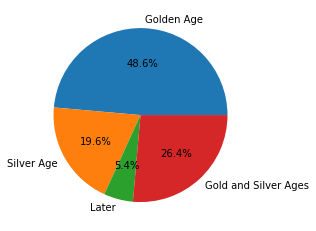

In [105]:
plt.pie(nums, labels=labels, autopct='%1.1f%%')
plt.show()

## sword word analysis:

In [60]:
#latlib_df['term'] = ''

In [61]:
#gladius:
gladius = latlib_df[(latlib_df.text.str.contains(pat = 'gladius', case=False)) | (latlib_df.text.str.contains(pat = 'gladii', case=False)) | (latlib_df.text.str.contains(pat = 'gladi', case=False)) | (latlib_df.text.str.contains(pat = 'gladio', case=False)) | (latlib_df.text.str.contains(pat = 'gladium', case=False)) | (latlib_df.text.str.contains(pat = 'gladie', case=False)) | (latlib_df.text.str.contains(pat = 'gladiorum', case=False)) | (latlib_df.text.str.contains(pat = 'gladiis', case=False)) | (latlib_df.text.str.contains(pat = 'gladios', case=False))]

In [62]:
#ferrum:
ferrum = latlib_df[(latlib_df.text.str.contains(pat = 'ferrum', case=False)) | (latlib_df.text.str.contains(pat = 'ferri', case=False)) | (latlib_df.text.str.contains(pat = 'ferro', case=False)) | (latlib_df.text.str.contains(pat = 'ferra', case=False)) | (latlib_df.text.str.contains(pat = 'ferrorum', case=False)) | (latlib_df.text.str.contains(pat = 'ferris', case=False))]

In [63]:
#mucro:
mucro = latlib_df[(latlib_df.text.str.contains(pat = 'mucro', case=False)) | (latlib_df.text.str.contains(pat = 'mucronis', case=False)) | (latlib_df.text.str.contains(pat = 'mucroni', case=False)) | (latlib_df.text.str.contains(pat = 'mucronem', case=False)) | (latlib_df.text.str.contains(pat = 'mucrone', case=False)) | (latlib_df.text.str.contains(pat = 'mucrones', case=False)) | (latlib_df.text.str.contains(pat = 'mucronum', case=False)) | (latlib_df.text.str.contains(pat = 'mucronibus', case=False))]

In [64]:
#ensis:
ensis = latlib_df[(latlib_df.text.str.contains(pat = 'ensis', case=False)) | (latlib_df.text.str.contains(pat = 'ensi', case=False)) | (latlib_df.text.str.contains(pat = 'ensem', case=False)) | (latlib_df.text.str.contains(pat = 'ense', case=False)) | (latlib_df.text.str.contains(pat = 'enses', case=False)) | (latlib_df.text.str.contains(pat = 'ensium', case=False)) | (latlib_df.text.str.contains(pat = 'ensibus', case=False))]

In [65]:
#capulus:
capulus = latlib_df[(latlib_df.text.str.contains(pat = 'capulus', case=False)) | (latlib_df.text.str.contains(pat = 'capuli', case=False)) | (latlib_df.text.str.contains(pat = 'capulo', case=False)) | (latlib_df.text.str.contains(pat = 'capulum', case=False)) | (latlib_df.text.str.contains(pat = 'capulorum', case=False)) | (latlib_df.text.str.contains(pat = 'capulis', case=False)) | (latlib_df.text.str.contains(pat = 'capulos', case=False))]

In [66]:
#let's see how many occurences of each word there are:
print('gladius: ',len(gladius))
print('ferrum: ',len(ferrum))
print('mucro: ',len(mucro))
print('ensis: ',len(ensis))
print('capulus: ',len(capulus)) #'capulus' is the least common, only appearing 48 times, let's look at that data!

gladius:  277
ferrum:  462
mucro:  89
ensis:  573
capulus:  48


In [67]:
capulus.head()

,title,text,text_raw,tokens,token_count,max_line_length,style,author,life_span,era,term
1,Valerius Maximus I,VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILIV...,[VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILI...,"[VALERI, MAXIMI, FACTORVM, ET, DICTORVM, MEMOR...",10524,2080,prose,VALERIVS MAXIM,1st century A.D.,Silver Age,
25,Statius: Achilleid II,PVBLIVS PAPINIVS STATIVS ACHILLEID II Exuit im...,"[PVBLIVS PAPINIVS STATIVS, \nACHILLEID II\n, \...","[PVBLIVS, PAPINIVS, STATIVS, ACHILLEID, II, Ex...",1243,71,verse,PVBLIVS PAPINIVS STATI,c. 45 – 96 A.D.,Silver Age,
31,Statius: Thebaid XI,PVBLIVS PAPINIVS STATIVS THEBAID XI Postquam m...,"[PVBLIVS PAPINIVS STATIVS, \nTHEBAID XI\n, \nP...","[PVBLIVS, PAPINIVS, STATIVS, THEBAID, XI, Post...",6017,72,verse,PVBLIVS PAPINIVS STATI,c. 45 – 96 A.D.,Silver Age,
34,Statius: Thebaid XII,PVBLIVS PAPINIVS STATIVS THEBAID XII Nondum cu...,"[PVBLIVS PAPINIVS STATIVS, \nTHEBAID XII\n, \n...","[PVBLIVS, PAPINIVS, STATIVS, THEBAID, XII, Non...",6244,72,verse,PVBLIVS PAPINIVS STATI,c. 45 – 96 A.D.,Silver Age,
35,Statius: Thebaid IX,PVBLIVS PAPINIVS STATIVS THEBAID IX Asperat Ao...,"[PVBLIVS PAPINIVS STATIVS, \nTHEBAID IX\n, \nA...","[PVBLIVS, PAPINIVS, STATIVS, THEBAID, IX, Aspe...",6925,74,verse,PVBLIVS PAPINIVS STATI,c. 45 – 96 A.D.,Silver Age,


Just from looking at these titles there's a pretty fair distribution of genre between the works (some philosophy, epic poetry, history, and even comedy plays!)

In [68]:
print(len(gladius[gladius['style']=='prose'])/len(gladius)*100)
print(len(gladius[gladius['style']=='verse'])/len(gladius)*100)
#the results here are skewed highly in favor of prose

79.78339350180505
20.216606498194945


In [69]:
print(len(ferrum[ferrum['style']=='prose'])/len(ferrum)*100)
print(len(ferrum[ferrum['style']=='verse'])/len(ferrum)*100)
#here there's more in the prose category

66.88311688311688
33.116883116883116


In [70]:
print(len(mucro[mucro['style']=='prose'])/len(mucro)*100)
print(len(mucro[mucro['style']=='verse'])/len(mucro)*100)
#it's closer here, but still in favor of prose

65.1685393258427
34.831460674157306


In [71]:
print(len(ensis[ensis['style']=='prose'])/len(ensis)*100)
print(len(ensis[ensis['style']=='verse'])/len(ensis)*100)
#heavily in favor of prose

70.85514834205934
29.144851657940663


In [72]:
print(len(capulus[capulus['style']=='prose'])/len(capulus)*100)
print(len(capulus[capulus['style']=='verse'])/len(capulus)*100)
#interestingly enough, verse is more popular than prose here

39.58333333333333
60.416666666666664


because the results are overwhelmingly in favor of prose in most categories let's look at how they match up in latlib_df

In [73]:
print(len(latlib_df[latlib_df['style']=='prose']))
print(len(latlib_df[latlib_df['style']=='verse']))
#so prose definitely shows more than verse, which is not super surprising

425
185


In [74]:
p_n = len(latlib_df[latlib_df['style']=='prose'])/len(latlib_df)*100
v_n = len(latlib_df[latlib_df['style']=='verse'])/len(latlib_df)*100
print('percentage of prose works in data: ',p_n,'%')
print('percentage of verse works in data: ',v_n,'%')

percentage of prose works in data:  69.67213114754098 %
percentage of verse works in data:  30.327868852459016 %


In [75]:
gladius.term = ['gladius' for x in gladius.term]
ferrum.term = ['ferrum' for x in ferrum.term]
mucro.term = ['mucro' for x in mucro.term]
ensis.term = ['ensis' for x in ensis.term]
capulus.term = ['capulus' for x in capulus.term]

/Users/francesharrington/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [76]:
ensis.head(5)

,title,text,text_raw,tokens,token_count,max_line_length,style,author,life_span,era,term
0,Ammianus: Liber XXXI,AMMIANI MARCELLINI HISTORIAE LIBER XXXI ...,"[AMMIANI MARCELLINI HISTORIAE LIBER XXXI\n, \n...","[AMMIANI, MARCELLINI, HISTORIAE, LIBER, XXXI, ...",11030,774,prose,AMMIANVS MARCELLIN,4th century A.D.,Later,ensis
1,Valerius Maximus I,VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILIV...,[VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILI...,"[VALERI, MAXIMI, FACTORVM, ET, DICTORVM, MEMOR...",10524,2080,prose,VALERIVS MAXIM,1st century A.D.,Silver Age,ensis
2,Valerius Maximus VIII,VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILIV...,[VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILI...,"[VALERI, MAXIMI, FACTORVM, ET, DICTORVM, MEMOR...",10337,1308,prose,VALERIVS MAXIM,1st century A.D.,Silver Age,ensis
3,Valerius Maximus IV,VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILIV...,[VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILI...,"[VALERI, MAXIMI, FACTORVM, ET, DICTORVM, MEMOR...",10852,2034,prose,VALERIVS MAXIM,1st century A.D.,Silver Age,ensis
4,Valerius Maximus VII,VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILIV...,[VALERI MAXIMI FACTORVM ET DICTORVM MEMORABILI...,"[VALERI, MAXIMI, FACTORVM, ET, DICTORVM, MEMOR...",8918,2141,prose,VALERIVS MAXIM,1st century A.D.,Silver Age,ensis


In [77]:
df_swords = pd.concat([gladius, ferrum, mucro, ensis, capulus])

In [78]:
df_swords.sample(5)

,title,text,text_raw,tokens,token_count,max_line_length,style,author,life_span,era,term
451,Quintilian: Institutio Oratoria IX,M. FABII QVINTILIANI INSTITVTIO ORATORIA LIBE...,[M. FABII QVINTILIANI INSTITVTIO ORATORIA LIB...,"[M., FABII, QVINTILIANI, INSTITVTIO, ORATORIA,...",24339,11805,prose,M. FABIVS QVINTILIAN,c. 35 – c. 100 A.D.,Silver Age,ferrum
335,Ovid: Ex Ponto III,P. OVIDI NASONIS EPISTVLAE EX PONTO LIBER TERT...,"[P. OVIDI NASONIS EPISTVLAE EX PONTO, \nLIBER ...","[P., OVIDI, NASONIS, EPISTVLAE, EX, PONTO, LIB...",5654,72,verse,P. OVIDIVS NA,43 B.C. – 17 A.D.,Gold and Silver Ages,ferrum
305,Livy VI,TITI LIVI AB VRBE CONDITA LIBER VI ...,"[TITI LIVI AB VRBE CONDITA LIBER VI\n, \n\n, \...","[TITI, LIVI, AB, VRBE, CONDITA, LIBER, VI, [, ...",15549,2409,prose,T. LIVI,59 B.C. – A.D. 17 . LIVI,Gold and Silver Ages,ferrum
525,Seneca: Quaestiones Naturales II,L. ANNAEI SENECAE QUAESTIONES NATURALES LIBER ...,"[L. ANNAEI SENECAE QUAESTIONES NATURALES\n, \n...","[L., ANNAEI, SENECAE, QUAESTIONES, NATURALES, ...",9858,927,prose,L. ANNAEVS SENE,c. 4 B.C. – A.D. 65,Gold and Silver Ages,ferrum
520,Seneca: Quaestiones Naturales I,L. ANNAEI SENECAE QUAESTIONES NATURALES LIBER ...,"[L. ANNAEI SENECAE QUAESTIONES NATURALES\n, \n...","[L., ANNAEI, SENECAE, QUAESTIONES, NATURALES, ...",9728,1013,prose,L. ANNAEVS SENE,c. 4 B.C. – A.D. 65,Gold and Silver Ages,ferrum


In [79]:
print('gladius era variance: ', len(set([x for x in gladius['life_span']])))
print('ferrum era variance: ',len(set([x for x in ferrum['life_span']])))
print('mucro era variance: ',len(set([x for x in mucro['life_span']])))
print('ensis era variance: ',len(set([x for x in ensis['life_span']])))
print('capulus era variance: ',len(set([x for x in capulus['life_span']]))) #capulus has the least amount of era variance, lets take a look!

gladius era variance:  22
ferrum era variance:  26
mucro era variance:  16
ensis era variance:  27
capulus era variance:  12


In [117]:
print((set([x for x in capulus['era']]))) #covers all the bases! let's look at exact years...
print((set([x for x in capulus['life_span']])))
#pretty large span of time too, from the 2nd century BC to the 4th century AD!
#however, the majority of usage comes from after the year 0

{'Later', 'none', 'Silver Age', 'Gold and Silver Ages', 'Golden Age'}
{' 63 – c. 113 A.D.  SECVND', ' c. 56 – c. 117 A.D. ', ' 1st century A.D. ', ' 25/6 – 101 A.D. ', ' 116 – 27 B.C. ', 'none', ' 106 – 43 B.C. ', ' 70 – 19 B.C. ', ' 43 B.C. – 17 A.D. ', ' c. 45 – 96 A.D. ', ' c. 4 B.C. – A.D. 65 ', ' 4th century A.D. '}


Below lets look at era usages for "capulus" and "gladius"

In [118]:
labels = "Golden Age", "Silver Age", "Later", "Gold and Silver Ages"
G = len(capulus[capulus.era=='Golden Age'])
S = len(capulus[capulus.era=='Silver Age'])
L = len(capulus[capulus.era=='Later'])
GaS = len(capulus[capulus.era=='Gold and Silver Ages'])
nums = [G, S, L, GaS]

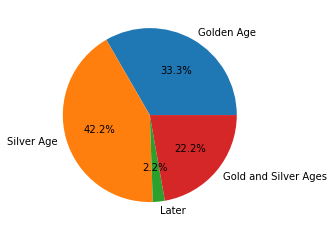

In [119]:
plt.pie(nums, labels=labels, autopct='%1.1f%%')
plt.show()

In [120]:
labels = "Golden Age", "Silver Age", "Later", "Gold and Silver Ages"
G = len(gladius[gladius.era=='Golden Age'])
S = len(gladius[gladius.era=='Silver Age'])
L = len(gladius[gladius.era=='Later'])
GaS = len(gladius[gladius.era=='Gold and Silver Ages'])
nums = [G, S, L, GaS]

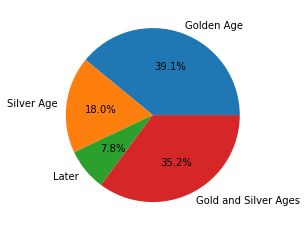

In [121]:
plt.pie(nums, labels=labels, autopct='%1.1f%%')
plt.show()

In [81]:
#lets look through author usages now:
print(set(df_swords.author))#all the authors that use a sword word
print(len(set(df_swords.author))) #that would be all 31, according to the set difference check below

{'CORNELIVS NEP', 'M. VITRVVIVS POLL', 'M. PORCIVS CATO CENS', 'none', 'FLOR', 'AMMIANVS MARCELLIN', 'P. OVIDIVS NA', 'C. SVETONIVS TRANQVILL', 'TITVS LVCRETIVS CAR', 'AVLVS GELLI', 'ALBIVS TIBVLL', 'SCRIPTORES HISTORIAE AVGVST', 'PHAEDR', 'C. SALLVSTIVS CRISP', 'P. TERENTIVS AF', 'GAIVS VALERIVS FLACC', 'C. IULIUS CAES', 'C. PLINIVS CAECILIVS SECVND', 'T. LIVI', 'M. FABIVS QVINTILIAN', 'SILIVS ITALIC', 'VALERIVS MAXIM', 'P. CORNELIVS TACIT', 'P. VERGILIVS MA', 'M. TERENTIVS VAR', 'L. ANNAEVS SENE', 'SEXTVS PROPERTI', 'EVTROPI', 'M. TVLLIVS CICE', 'PVBLIVS PAPINIVS STATI', 'C. PETRONI'}
31


In [82]:
x = set(df_swords.author)
y = set(latlib_df.author)
z = x.difference(y)
print(z) #yep, every author uses a sword word in at least one work!

set()


final stat overview & save updated examples out:

In [83]:
latlib_df.describe()

,token_count,max_line_length
count,610.000000,610.000000
mean,6975.355738,1315.316393
std,5442.246454,1847.014180
min,94.000000,51.000000
25%,2771.000000,77.000000
50%,6032.000000,646.000000
75%,9302.750000,2001.000000
max,38414.000000,20845.000000


In [84]:
#updated data samples so they reflect my current data:
examples = latlib_df.head(10)
examples.to_pickle("/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/data_samples/examples.pkl")